<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Восстановление-золота-из-руды" data-toc-modified-id="Восстановление-золота-из-руды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Восстановление золота из руды</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-разных-этапах" data-toc-modified-id="Концентрация-металлов-на-разных-этапах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Концентрация металлов на разных этапах</a></span></li><li><span><a href="#Сравним-размеры-гранул-на-разных-этапах" data-toc-modified-id="Сравним-размеры-гранул-на-разных-этапах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравним размеры гранул на разных этапах</a></span></li><li><span><a href="#Суммарная-концентрация-на-выборках" data-toc-modified-id="Суммарная-концентрация-на-выборках-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарная концентрация на выборках</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Модель-Линейной-регрессии" data-toc-modified-id="Модель-Линейной-регрессии-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель Линейной регрессии</a></span></li><li><span><a href="#Модель-Дерево-решений" data-toc-modified-id="Модель-Дерево-решений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель Дерево решений</a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Модель случайный лес</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

**Проект. Восстановление золота из руды**

**Задача:** Подготовить прототип модели машинного обучения для «Цифры»

**Цель:** Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды

**Данные:** выгрузка данных предоставлена для построения модели (общий датасет, обучающая и тестовая выборки)

**План исследования:** 
Подготовить данные; Провести исследовательский анализ данных; Построить и обучить модель

# Подготовка данных

## Ознакомление с данными

In [1]:
#загрузим библиотеки

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor



In [2]:
# загрузим и откроем данные для анализа

try:
    data = pd.read_csv('gold_recovery_full_new.csv')
except:
    data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
try:
    data_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
 

try:
    data_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')


Проверим, верно ли рассчитана  эффективность обогащения.
Вычислим её на обучающей выборке для признака rougher.output.recovery
Создадим отдельный датасет с необходимыми значениями для расчета ниже формула,
где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

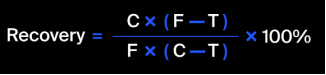

In [3]:
# создадим отдельный датасет с необходимыми колонками и создадим колонку с вычислением

check_rec = data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.recovery']].copy()
check_rec['check_rec'] = (check_rec['rougher.output.concentrate_au'] * (check_rec['rougher.input.feed_au'] \
                                                                        - check_rec['rougher.output.tail_au'])) \
/ (check_rec['rougher.input.feed_au'] * (check_rec['rougher.output.concentrate_au'] \
                                         - check_rec['rougher.output.tail_au'])) * 100 


In [4]:
# рассчитаем МАЕ (среднее абсолютное отклонение)

mean_absolute_error(check_rec['check_rec'], check_rec['rougher.output.recovery'])

# такое низкое отклонение говорит о  том, что в датасете расчет эффективности обогащения rougher.output.recovery выполнен верно


9.73512347450521e-15

In [5]:
# при проверке количества колонок  в тестовой выборке обнаружилось отсутствие части колонок.

print(data.shape)
print(data_train.shape)
print(data_test.shape)

(19439, 87)
(14149, 87)
(5290, 53)


In [6]:
# раскроем все колонки в датасете

pd.set_option('display.max_columns', 87)

In [7]:
# изучим датасет

display(data.head())
display(data_train.head())
display(data_test.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [8]:
# проверим пропуски и типы данных

print(data.info())
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
#Проверим какие колонки отсутствуют в тестовой выборке

lost_col_test = list(set(data_train.columns) - set(data_test.columns))

lost_col_test

# отсутствуют данные по доле концентрата на всех этапах обработки после чистки и вычисления.
# Также отсутствует эффективность обогащения

['final.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.concentrate_pb',
 'final.output.tail_pb',
 'final.output.recovery',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'final.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_au',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.recovery',
 'primary_clean

В тестовой выборке отсутствуют два целевых признака - final.output.recovery, rougher.output.recovery, признаки 'output' и calculation признаки

## Предобработка данных

In [10]:
#  в данном списке удалим эффективности обогащения, чтоб в дальнейшем использовать данный список для удаления колонок в обучающей выборке
# и уровень концентрата металлов после флотации, чтоб иметь возможность удалить выбросы
lost_col_test.remove('rougher.output.recovery')
lost_col_test.remove('final.output.recovery')
lost_col_test.remove('rougher.output.concentrate_au')
lost_col_test.remove('rougher.output.concentrate_sol')
lost_col_test.remove('rougher.output.concentrate_pb')
lost_col_test.remove('rougher.output.concentrate_ag')
lost_col_test


['final.output.tail_ag',
 'rougher.output.tail_au',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'final.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_ag',
 'final.output.tail_au',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'final.output.concentrate_sol',
 'rougher.output.tail_pb']

In [11]:
data_test = data_test.merge(data[['date', 'final.output.recovery', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag']], on='date', how='left')
data_test.shape


(5290, 59)

In [12]:
data_train = data_train.drop(lost_col_test, axis=1)
data_train.shape

(14149, 59)

In [13]:
# Проверим долю пропусков. 

round(data_train.isna().sum()/len(data_train)*100, 2).head(50)
round(data_train.isna().sum()/len(data_train)*100, 2).tail(50)
round(data_train.isna().sum()/len(data_train)*100, 2).sum()


round(data_test.isna().sum()/len(data_test)*100, 2).head(50)
round(data_test.isna().sum()/len(data_test)*100, 2).tail(50)
round(data_test.isna().sum()/len(data_test)*100, 2).sum()

1.73

В обучающей выборке в среднем пропусков менее 1%, только в некоторых колонках встречаются пропуски в пределах 3%. Максимально возможно кол-во пропусков в обучающей выборке  - 12%. Но скорее всего многие пропуски совпадают между собой, поэтому кол-во пропусков будет небольшим и мы можем спокойно заменим все пропуски методом bfill/ffill, т..к все последующие данные в строке идут последовательно. 
В тестовой выборке пропусков менее 1%, общее кол-во пропусков менее 2%, поэтому в тестовой выборке поступим также

In [14]:
# выгрузим данные с пропусками, чтоб была возможноть проверить верность работы функции bfill

data_train.loc[data_train.isnull().any(axis=1)].head()

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,55.088448,126.397495,12.709727,7.25,1.229626,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,-500.461991,1604.014273,-501.824136,7.934791,1.763437,229.379445,40.601032,NaN,5.587750,10.865871,5.648950,10.786929,5.638302,0.000000,0.000000,0.000000,0.000000,0.000000,1003.354806,-501.078303,1603.648910,-498.000810,1603.488420,-495.577057,1402.004381,-497.117094,1203.394353,-494.391170,1202.592202,-500.167701,26.069763,-502.180953,24.044256,-502.252420,25.024571,-499.417407,23.983086,-499.931140,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
96,2016-01-19 02:00:00,58.017871,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,-502.251161,1550.956703,-499.542807,7.495765,0.992989,0.346667,40.044981,NaN,3.331100,NaN,0.002655,NaN,NaN,7.306548,8.859399,NaN,7.624713,26.275908,1000.522008,-503.745501,1599.821435,-499.801108,1597.451018,-500.766312,1397.138554,-498.298705,1200.543727,-500.259976,1099.579887,-501.842326,25.038013,-499.471361,22.988086,-499.907667,23.960020,-500.299632,22.984336,-507.682548,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
98,2016-01-20 17:00:00,49.836467,45.682471,4.025308,7.25,0.399221,1549.121877,-498.662929,1550.086558,-500.499551,1547.956133,-498.348771,1546.991424,-500.704599,9.013887,1.941373,154.555548,55.810590,NaN,5.497273,3.921357,3.605430,3.927243,3.600455,11.285173,7.812794,19.552023,18.334857,70.229022,1000.327210,-508.715859,1601.364457,-499.893146,1601.999702,-498.227550,1408.585127,-498.741393,1201.106163,-500.084948,1100.228204,-498.220634,24.991085,-504.593474,23.047950,-500.122720,24.090581,-500.186756,23.070755,-499.814882,14.055718,-549.694176,12.005398,-550.660760,10.019514,-501.677694,8.123011,-499.966297,11.995185,-601.176360
114,2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,Na

In [15]:
# заменим все пропуски последующими данными

data_train = data_train.bfill(axis=1)


In [16]:
# проверим верно ли сработала функция

data_train[114:116]

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,74.257359,7.25,7.25,7.25,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,4.203939,41.78257,41.78257,41.78257,9.953462,13.678706,13.678706,13.678706,13.678706,13.678706,7.790201,28.779023,19.650397,86.217222,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,-501.357678,1196.516363,-505.322143,1097.010735,-499.416892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,2016-01-21 11:00:00,72.591034,226.482598,15.988715,7.25,1.177436,1551.478928,-500.297355,1552.263619,-500.38531,1551.033618,-501.084621,1548.019363,-498.248448,12.157881,4.187072,629.869575,64.640971,42.297118,10.018148,21.212174,7.815061,21.202685,7.783254,13.874464,7.780895,29.02042,19.846317,84.773069,1001.881444,-499.979072,1601.857535,-498.607855,1600.150978,-497.100764,1404.006789,-499.828588,1202.257112,-498.304955,1102.077526,-499.363824,25.043738,-500.52718,22.9673,-499.16486,24.016298,-496.333432,22.972694,-500.758058,14.080498,-548.457442,11.982429,-549.290032,10.122944,-488.774842,7.968697,-500.079061,12.042943,-598.392513


In [17]:
# в  тестовой выборке просто удалим пропуски, т..к их немного менее 2%

data_test = data_test.dropna()


In [18]:
# проверим остались ли пропуски в данных
print(data_train.isna().sum())
print(data_test.isna().sum())

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [19]:
# найдем где остались пропуски в обучающей выборке 

data_train.loc[data_train.isnull().any(axis=1)]

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,74.257359,7.25,7.25,7.25,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,12.028591,4.203939,41.78257,41.78257,41.78257,9.953462,13.678706,13.678706,13.678706,13.678706,13.678706,7.790201,28.779023,19.650397,86.217222,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,1393.735867,-501.357678,1196.516363,-505.322143,1097.010735,-499.416892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# используем аналогичный метод, только для заполнения используется предыдущие данные - ffill

data_train = data_train.ffill(axis=1)
data_train.isna().sum()

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [21]:
# Дубликатов не обнаружено при проверке

data_train[data_train.duplicated()].head()
data_test[data_test.duplicated()].head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_sol,rougher.output.concentrate_pb,rougher.output.concentrate_ag


In [22]:
# в связи с тем, что индексная колонка для всех датасетов будет date, то необходимо проверить имеются ли дупликаты в ней

data[data['date'].duplicated()].head() #дубликатов нет

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [23]:
# проверим статистические показатели

data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

## Вывод:

Проверили и убедились, что расчет эффективности обогащения в датасете произведен верно.
Все данные имеют тип float, что соответcтвует ожиданиям. Только идентификационная колонка имеет тип данных object.
В предоставленных данных имеются пропуски, но их кол-во мало, поэтому спокойно удаляем данные с пропусками.

В тестовой выборке отсутствуют два целевых признака - final.output.recovery, rougher.output.recovery. Целевые признаки нам необходимы для построения модели, поэтому необходимо вернуть эти признаки в тестовую выборку из исходного датасета по идентификационной колонке Date.

В тестовой выборке отсутствуют признаки 'output', которые мы получаем только после обработки частей руды, или calculation признаки, которые до обработки сырья на определенном этапе нам неизвестны. Поэтому, из обучающей выборки необходимо удалить столбцы, которые отсутствуют в тестовой выборке, за исключением целевых признаков.

# Анализ данных 

## Концентрация металлов на разных этапах

Проверим как меняется концентрация металла на различных  этапах очистки
Au, Ag, Pb, Sol

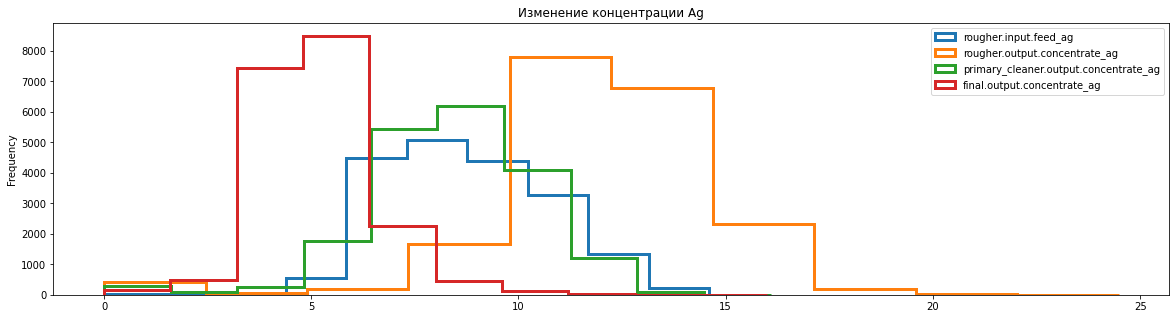

In [24]:
# серебро
ax = data.plot(kind='hist', y='rougher.input.feed_ag', histtype='step', linewidth = 3, figsize=(20,5))
ax_1 = data.plot(kind='hist', y='rougher.output.concentrate_ag', histtype='step', ax= ax, linewidth = 3, figsize=(20,5))
ax_2 = data.plot(kind='hist', y='primary_cleaner.output.concentrate_ag', histtype='step', ax= ax_1, linewidth = 3, figsize=(20,5))
data.plot(kind='hist', y='final.output.concentrate_ag', histtype='step', ax = ax_2, linewidth = 3, figsize=(20,5), title="Изменение концентрации Ag");

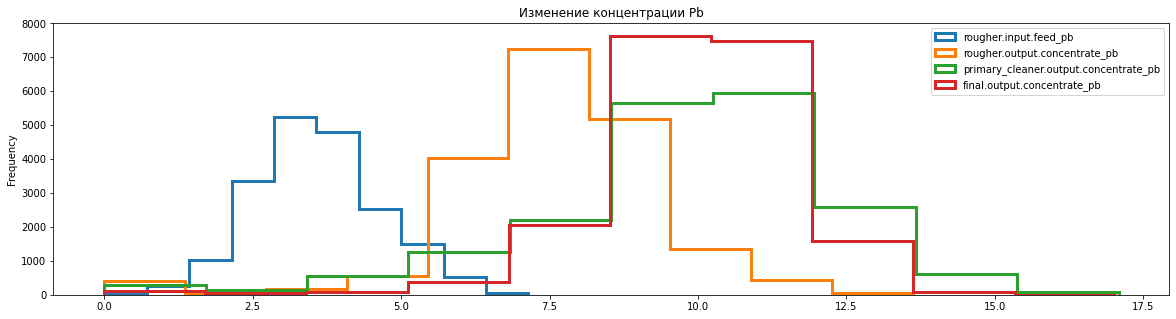

In [25]:
# свинец
ax = data.plot(kind='hist', y='rougher.input.feed_pb', histtype='step', linewidth = 3, figsize=(20,5))
ax_1 = data.plot(kind='hist', y='rougher.output.concentrate_pb', histtype='step', ax= ax, linewidth = 3, figsize=(20,5))
ax_2 = data.plot(kind='hist', y='primary_cleaner.output.concentrate_pb', histtype='step', ax= ax_1, linewidth = 3, figsize=(20,5))
data.plot(kind='hist', y='final.output.concentrate_pb', histtype='step', ax = ax_2, linewidth = 3, figsize=(20,5), title="Изменение концентрации Pb");


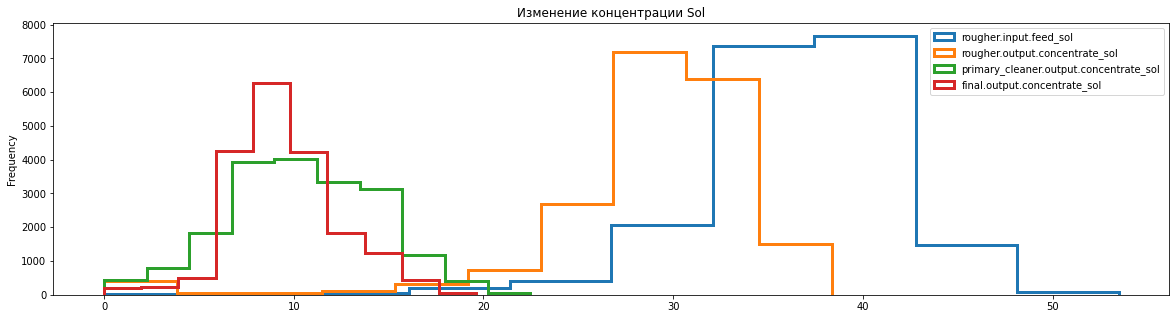

In [26]:
# sol
ax = data.plot(kind='hist', y='rougher.input.feed_sol', histtype='step', linewidth = 3, figsize=(20,5))
ax_1 = data.plot(kind='hist', y='rougher.output.concentrate_sol', histtype='step', ax= ax, linewidth = 3, figsize=(20,5))
ax_2 = data.plot(kind='hist', y='primary_cleaner.output.concentrate_sol', histtype='step', ax= ax_1, linewidth = 3, figsize=(20,5))
data.plot(kind='hist', y='final.output.concentrate_sol', histtype='step', ax = ax_2, linewidth = 3, figsize=(20,5), title="Изменение концентрации Sol");

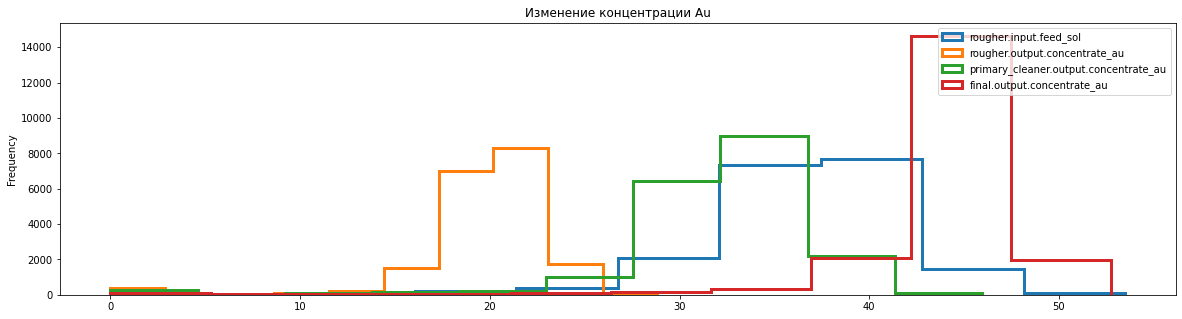

In [27]:
# золото
ax = data.plot(kind='hist', y='rougher.input.feed_sol', histtype='step', linewidth = 3, figsize=(20,5))
ax_1 = data.plot(kind='hist', y='rougher.output.concentrate_au', histtype='step', ax= ax, linewidth = 3, figsize=(20,5))
ax_2 = data.plot(kind='hist', y='primary_cleaner.output.concentrate_au', histtype='step', ax= ax_1, linewidth = 3, figsize=(20,5))
data.plot(kind='hist', y='final.output.concentrate_au', histtype='step', ax = ax_2, linewidth = 3, figsize=(20,5), title="Изменение концентрации Au");

В основной массе в руде изначально содержится sol, который удаляется при очистке. Серебро удаляется прямопропорционально. Свинец удаляется в меньшем кол-ве, т.к. при очистке концентрат его увеличивается. Золота в свою очередь при каждой очистке становится больше в концентрате

## Сравним размеры гранул на разных этапах

 Сравним распределение размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

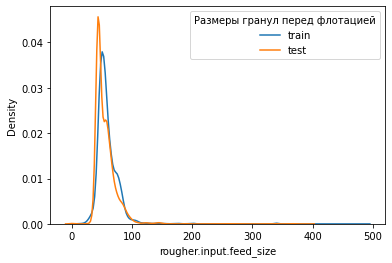

In [28]:
sns.kdeplot(x='rougher.input.feed_size', data=data_train, label='train');
sns.kdeplot(x='rougher.input.feed_size', data=data_test, label='test');
plt.legend(title="Размеры гранул перед флотацией");

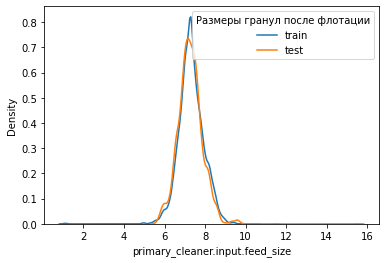

In [29]:
sns.kdeplot(x='primary_cleaner.input.feed_size', data=data_train, label='train');
sns.kdeplot(x='primary_cleaner.input.feed_size', data=data_test, label='test');
plt.legend(title="Размеры гранул после флотации");


гранулы в тестовой и обучающейся выборках до и после флотации практически одинаковые, поэтому можно строить модель без опасения некорректности анализа

##  Суммарная концентрация на выборках

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентрата

In [30]:
df= pd.DataFrame()
df['sum_rougher.input.feed'] = data['rougher.input.feed_au'] + data['rougher.input.feed_sol'] \
+ data['rougher.input.feed_pb'] + data['rougher.input.feed_ag']

In [31]:
df['sum_rougher_concentrate'] = data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_sol'] \
+ data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_ag']

In [32]:
df['sum_cleaner_concentrate'] = data['primary_cleaner.output.concentrate_au'] + data['primary_cleaner.output.concentrate_sol'] \
+ data['primary_cleaner.output.concentrate_pb'] + data['primary_cleaner.output.concentrate_ag']

In [33]:
df['sum_final_concentrate'] = data['final.output.concentrate_au'] + data['final.output.concentrate_sol'] \
+ data['final.output.concentrate_pb'] + data['final.output.concentrate_ag']

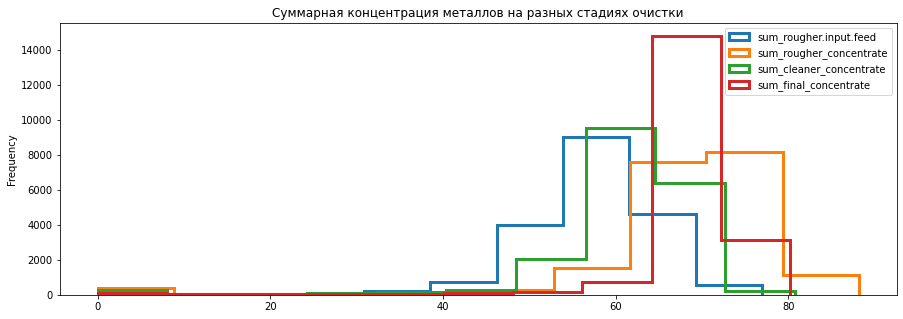

In [34]:
ax = df.plot(kind='hist', y = 'sum_rougher.input.feed', histtype='step', linewidth = 3, figsize=(15,5))
ax_1 = df.plot(kind='hist', y = 'sum_rougher_concentrate', histtype='step', ax= ax, linewidth = 3, figsize=(15,5))
ax_2 = df.plot(kind='hist', y = 'sum_cleaner_concentrate', histtype='step', ax= ax_1, linewidth = 3, figsize=(15,5))
df.plot(kind='hist', y = 'sum_final_concentrate', histtype='step', ax = ax_2, linewidth = 3, figsize=(15,5), title='Суммарная концентрация металлов на разных стадиях очистки');


In [35]:
# на графике наблюдаются выбросы  от 0 до 40. Удалим все выбросы из обучающей и тестовой выборках

data_train = data_train[(data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_sol'] \
                         + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_ag']) > 40]
data_test = data_test[(data_test['rougher.output.concentrate_au'] + data_test['rougher.output.concentrate_sol'] \
                         + data_test['rougher.output.concentrate_pb'] + data_test['rougher.output.concentrate_ag']) > 40]

print(data_train.shape)
print(data_test.shape)

(13699, 59)
(5107, 59)


## Вывод
Концентрация металлов по мере прохождения чистки уменьшается, а концентрация золота увеличивается, что логично.

Исследуемые размеры гранул в выборках тестовой и обучающей практически одинаковые, что позволяет производить спокойно обучение модели на выборке и не опасаться некорректных данных в тестовой выборке.

Найдя суммарную концентрацию металлов и построив график мы увидели наличия выбросов от 0 до 40. Выбросы в тестовой и обучающей выборках удалили.

# Модель

Для решения задачи введём метрику качества — sMAPE (симметричное среднее абсолютное процентное отклонение).
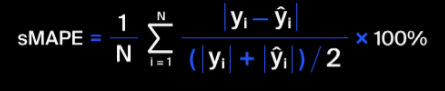
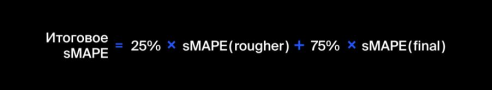
Обозначения:
Yi = Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
`Yi = Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
N = Количество объектов в выборке.
∑ = Суммирование по всем объектам выборки (i меняется от 1 до N).

In [36]:
# напишем функцию для вычисления sMAPE (симметричное среднее абсолютное процентное отклонение).

def smape(target, predictions):
    res = (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)).mean()
    res = res * 100
    return res

In [37]:
smape_scorer = make_scorer(smape, greater_is_better = False)

In [38]:
# напишем функцию для вычисления итоговой sMAPE (симметричное среднее абсолютное процентное отклонение)

def fin_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

## Обучение моделей

In [39]:
# подготовим данные для моделей

features_train = data_train.drop(['final.output.recovery','rougher.output.recovery', 'date'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

features_test= data_test.drop(['final.output.recovery','rougher.output.recovery', 'date'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [40]:
# проверим корреткность кол-ва колонок

print(features_train.shape)
print(target_train_rougher.shape)
print(target_train_final.shape)
print(features_test.shape)
print(target_test_rougher.shape)
print(target_test_final.shape)

(13699, 56)
(13699,)
(13699,)
(5107, 56)
(5107,)
(5107,)


In [41]:
dct_with_scores = {}

## Модель Линейной регрессии

In [42]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher,
                          features_train,
                          target_train_rougher,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features_train,
                        target_train_final,
                        scoring=smape_scorer,
                        cv=5)
smape_final_mean = smape_final.mean()
result_smape = fin_smape(final_smape_rougher, smape_final_mean)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 1.33 s, sys: 2.16 s, total: 3.49 s
Wall time: 3.5 s


## Модель Дерево решений

In [43]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_train,
                              target_train_rougher,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_final = cross_val_score(model_dt_final, 
                                  features_train,
                                  target_train_final,
                                  scoring=smape_scorer,
                                  cv=5)
    smape_final_mean = smape_final.mean()
    result_smape = fin_smape(final_smape_rougher, smape_final_mean)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 27.6 s, sys: 0 ns, total: 27.6 s
Wall time: 27.6 s


## Модель случайный лес

In [44]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_train,
                                  target_train_rougher,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_final = cross_val_score(model_rf_final,
                                features_train,
                                target_train_final,
                                scoring=smape_scorer,
                                cv=5)
        smape_final_mean = smape_final.mean()
        result_smape = fin_smape(final_smape_rougher, smape_final_mean)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 14min 24s, sys: 1.92 s, total: 14min 26s
Wall time: 14min 26s


In [45]:
for key in dct_with_scores.keys():
    print(f'\nРезультат {str(key).upper()} модели - {dct_with_scores[key][0]}')
    
# лучший результат показала модель Случайный лес с метрикой качества  sMAPE = 8,51, так как чем меньше метрика, тем модель лучше работает


Результат LR модели - 10.797581918511938

Результат DT модели - 9.52130265953604

Результат RF модели - 9.134249988147985


In [46]:
# определим лучшие параметры для модели Случайный лес

print('\nЛучшие параметры для модели Случайный лес: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


Лучшие параметры для модели Случайный лес: N_ESTIMATORS - 70, MAX_DEPTH - 4


## Проверка модели на тестовой выборке

In [51]:
# Используем лучшие параметры для модели Случайный лес в тестовой выборке и определим метрику качества sMAPE для 
# эффективностей обогащения чернового концентрата rougher.output.recovery и финального концентрата final.output.recovery

model_for_test_rougher = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=12345)
model_for_test_rougher.fit(features_train, target_train_rougher)
predicted_rougher = model_for_test_rougher.predict(features_test)

model_for_test_final = RandomForestRegressor(n_estimators=70, max_depth=2, random_state=12345)
model_for_test_final.fit(features_train, target_train_final)
predicted_final = model_for_test_final.predict(features_test)

smape_for_test_rougher = smape(target_test_rougher, predicted_rougher)
smape_for_test_final = smape(target_test_final, predicted_final)
final_smape_for_test = fin_smape(smape_for_test_rougher, smape_for_test_final)

In [52]:
print(f'\nsMAPE тестовой выборки - {final_smape_for_test}')


sMAPE тестовой выборки - 7.798243706014411


In [49]:
# проверим модель на адекватность 
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_train, target_train_rougher)
dummy_regr_for_final.fit(features_train, target_train_final)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_test)
dummy_predicted_final = dummy_regr_for_final.predict(features_test)

smape_const_rougher = smape(target_test_rougher, dummy_predicted_rougher)
smape_const_final = smape(target_test_final, dummy_predicted_final)

final_smape_for_const = fin_smape(smape_const_rougher, smape_const_final)


In [50]:
print(f'\nМетрика качества sMAPE для константной модели - {final_smape_for_const}')


Метрика качества sMAPE для константной модели - 8.4380471990257


## Вывод:
Цель проекта была построить модель, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Для анализа использовались готовые выгрузки (исходные данные, выборка обучающая и тетстовая выборка).
В данных имелись пропуски, но не в значительном кол-ве, поэтому все пропуски были удалены из выборок.
Все данные имеют тип float, что соответcтвует ожиданиям. Только колонка date имеет тип данных object. 

В тестовой выборке отсутствуют два целевых признака - final.output.recovery, rougher.output.recovery. Целевые признаки нам необходимы были для построения модели, поэтому мы вернули эти признаки в тестовую выборку из исходного датасета по идентификационной колонке Date.
В тестовой выборке отсутствуют признаки 'output', которые мы получаем только после обработки частей руды, или calculation признаки, которые до обработки сырья на определенном этапе нам неизвестны. Поэтому, из обучающей выборки были удалены столбцы, которые отсутствуют в тестовой выборке, за исключением целевых признаков.

При построении графика суммарной концентрации металлов, были обнаружены выбросы от 0 до 40. Выбросы в тестовой и обучающей выборках были удалены.

При построении модели лучший результат проказала модель Случайного леса, где метрика качества sMAPE (абсолютное отклонение) было наименьшим 8,51. После построения модели на тестовой выборке мы сравнили результат sMAPE с константной моделью, где результат тестовой выборки был меньше, а это говорит о том, что построенная модель рабочая.
